<a href="https://colab.research.google.com/github/rodrygofesantos/oficina_forped/blob/main/07_histograma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etapa 1: Importação das bibliotecas

* `pandas:` biblioteca usada para ler e manipular tabelas (como as de Excel ou CSV).

* `matplotlib.pyplot`: biblioteca usada para fazer gráficos.

* `matplotlib.ticker`: usada para configurar como os números aparecem no gráfico (por exemplo, com ponto separando milhares).

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Etapa 2: Carregar a planilha CSV

* Lê a planilha chamada `producao-cientifica-2024.csv`.
* Usa o formato de texto latino (`latin1`), comum em arquivos brasileiros.
* Define , como separador de colunas.

In [6]:
# Recarregar o CSV com separador correto (vírgula) e codificação apropriada
import pandas as pd

df = pd.read_csv("/content/producao-cientifica-2024.csv", sep=",", encoding="latin1")

# Etapa 3: Padronizar nomes das colunas

* Coloca todos os nomes de colunas em letras minúsculas.
* Remove espaços e acentos, substituindo por `underline _`, facilitando o uso no código.

In [7]:
# Renomear as colunas manualmente (corrigindo acentos)
df.columns = [
    'Ano', 'Outra produção bibliográfica', 'Trabalho em evento', 'Artigo publicado',
    'Capítulo de livro', 'Tradução', 'Livro publicado', 'Texto em jornal ou revista',
    'Partitura musical', 'Prefácio/Posfácio', 'Artigo aceito'
]

# Etapa 4: Selecionar apenas as colunas numéricas

* Seleciona todas as colunas exceto a primeira (que geralmente é o nome da instituição).

* Converte os valores para números.

* Substitui valores vazios por zero.

* Garante que todos os valores sejam do tipo inteiro.

In [8]:
# Converter colunas de produção para inteiros (preenchendo vazios com 0)
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

# Etapa 5: Somar os totais por tipo de produção

* Soma os valores de cada coluna (cada tipo de produção científica).
* Organiza do maior para o menor total.

In [9]:
# Somar totais por tipo de produção
totais = df.iloc[:, 1:].sum().sort_values(ascending=False)

# Etapa 6 - Plotar o gráfico

* Usa uma paleta de 20 cores diferentes para dar cor a cada barra do gráfico.
* Cria um espaço para desenhar (fig e ax).
* Plota as barras com os nomes das categorias e suas somas.
* Define título, rótulo do eixo Y e gira os nomes no eixo X.
* Formata o eixo Y com ponto como separador de milhares.
* Adiciona linhas horizontais para facilitar a leitura dos valores.

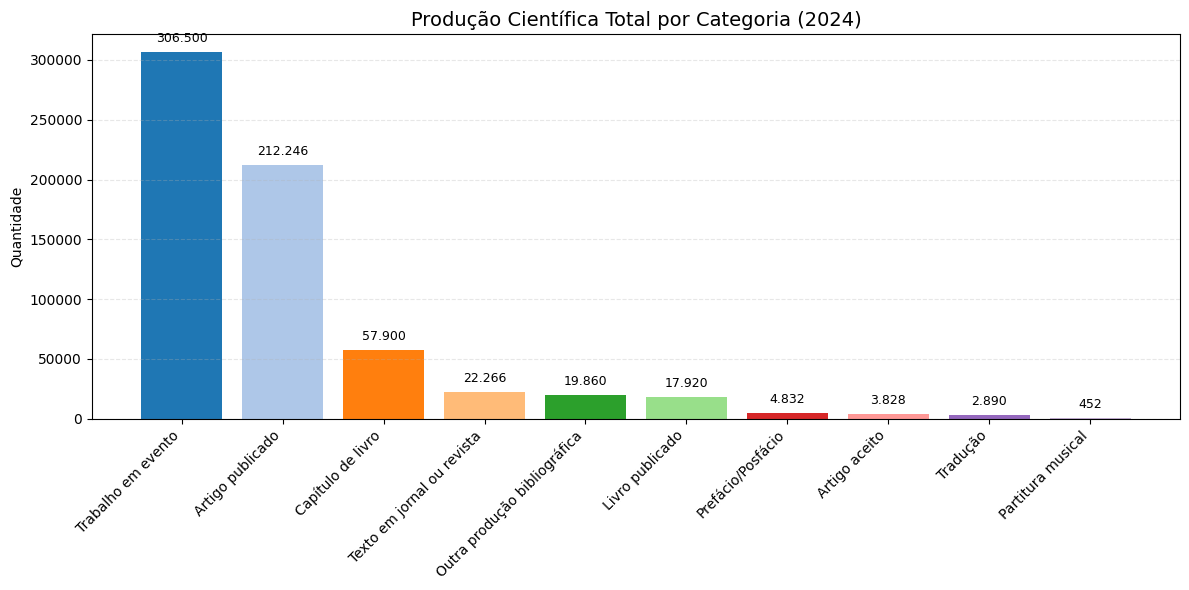

In [10]:
# Plotar o gráfico com rótulos e separador de milhar (formato brasileiro)
fig, ax = plt.subplots(figsize=(12, 6))
colors = plt.cm.tab20.colors[:len(totais)]
bars = ax.bar(totais.index, totais.values, color=colors)

# Adicionar rótulos nas barras
for bar in bars:
    altura = bar.get_height()
    ax.annotate(f'{altura:,.0f}'.replace(',', '.'),
                xy=(bar.get_x() + bar.get_width() / 2, altura),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

# Ajustes do gráfico
ax.set_title('Produção Científica Total por Categoria (2024)', fontsize=14)
ax.set_ylabel('Quantidade')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()

plt.show()

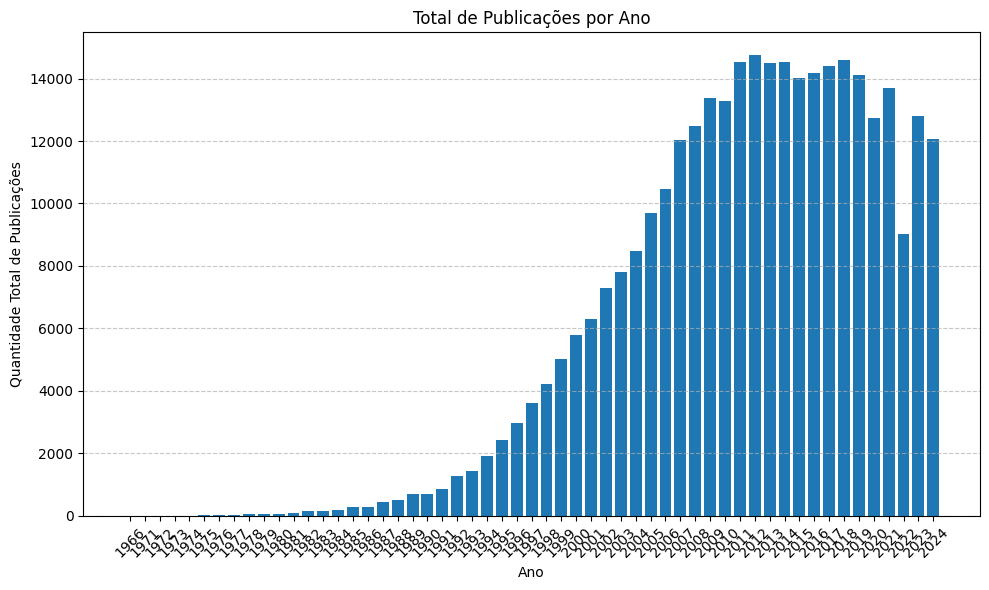

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o CSV
df = pd.read_csv("/content/producao-cientifica-2024.csv", sep=",", encoding="latin1")

# Lista das colunas de publicações (excluindo 'Ano')
colunas_publicacoes = [
    'Outra produÃ§Ã£o bibliogrÃ¡fica',
    'Trabalho em evento',
    'Artigo publicado',
    'Capitulo de livro',
    'TraduÃ§Ã£o',
    'Livro publicado',
    'Texto em jornal ou revista',
    'Partitura musical',
    'PrefÃ¡cio posfÃ¡cio',
    'Artigo aceito'
]

# Calcular o total de publicações por ano (sem adicionar ao df)
totais_por_ano = df[colunas_publicacoes].sum(axis=1)

# Ordenar o DataFrame por ano
df = df.sort_values("Ano")
totais_por_ano = totais_por_ano.loc[df.index]  # Alinhar índices com o df ordenado

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.bar(df["Ano"].astype(str), totais_por_ano)
plt.title("Total de Publicações por Ano")
plt.xlabel("Ano")
plt.ylabel("Quantidade Total de Publicações")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


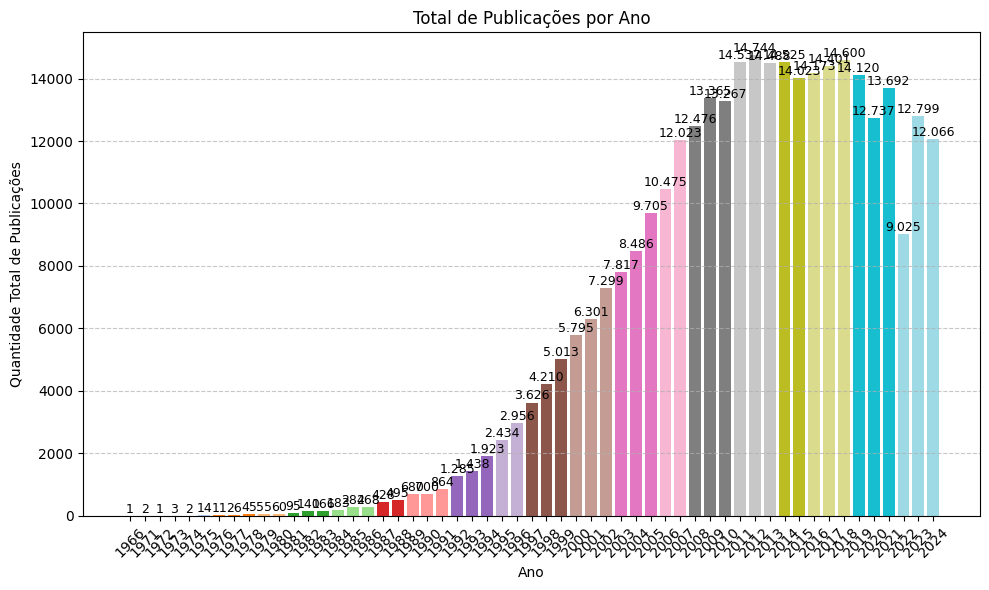

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carregar o CSV
df = pd.read_csv("/content/producao-cientifica-2024.csv", sep=",", encoding="latin1")

# Lista das colunas de publicações (exceto 'Ano')
colunas_publicacoes = [
    'Outra produÃ§Ã£o bibliogrÃ¡fica',
    'Trabalho em evento',
    'Artigo publicado',
    'Capitulo de livro',
    'TraduÃ§Ã£o',
    'Livro publicado',
    'Texto em jornal ou revista',
    'Partitura musical',
    'PrefÃ¡cio posfÃ¡cio',
    'Artigo aceito'
]

# Calcular total por ano (sem salvar no df)
totais_por_ano = df[colunas_publicacoes].sum(axis=1)

# Ordenar por ano e alinhar os totais
df = df.sort_values("Ano")
totais_por_ano = totais_por_ano.loc[df.index]

# Cores variadas por barra
cores = plt.cm.tab20(np.linspace(0, 1, len(df)))

# Plotar gráfico
plt.figure(figsize=(10, 6))
barras = plt.bar(df["Ano"].astype(str), totais_por_ano, color=cores)

# Adicionar rótulos no topo das barras
for barra, valor in zip(barras, totais_por_ano):
    plt.text(
        barra.get_x() + barra.get_width() / 2,
        barra.get_height() + 1,
        f"{int(valor):,}".replace(",", "."),
        ha='center',
        va='bottom',
        fontsize=9
    )

# Estética
plt.title("Total de Publicações por Ano")
plt.xlabel("Ano")
plt.ylabel("Quantidade Total de Publicações")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Vamos restringir os dados aos 10 ultimos anos.

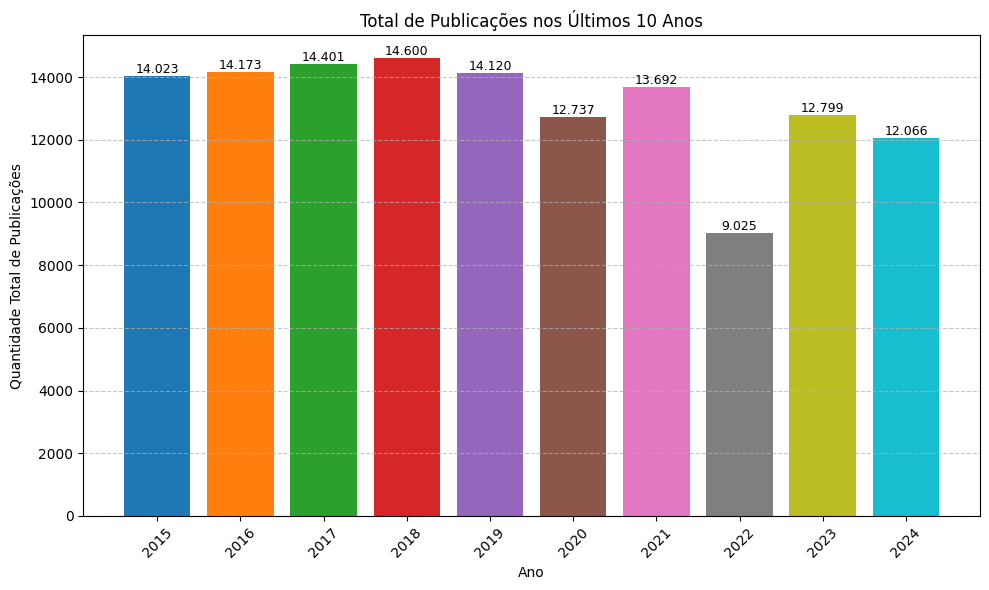

In [29]:
# Soma total por ano
df["Total de Publicações"] = df[colunas_publicacoes].sum(axis=1)

# Ordenar por ano e filtrar os últimos 10 anos
df = df.sort_values("Ano")
df_recente = df.tail(10)  # últimos 10 anos

# Dados do gráfico
anos = df_recente["Ano"].astype(str).tolist()
valores = df_recente["Total de Publicações"].tolist()
cores = plt.cm.tab10(np.linspace(0, 1, len(anos)))

# Plotar gráfico
plt.figure(figsize=(10, 6))
barras = plt.bar(anos, valores, color=cores)

# Adicionar rótulos
for barra, valor in zip(barras, valores):
    plt.text(
        barra.get_x() + barra.get_width() / 2,
        barra.get_height() + 1,
        f"{int(valor):,}".replace(",", "."),
        ha='center',
        va='bottom',
        fontsize=9
    )

# Estética final
plt.title("Total de Publicações nos Últimos 10 Anos")
plt.xlabel("Ano")
plt.ylabel("Quantidade Total de Publicações")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


`df_recente = df.tail(10)  # últimos 10 anos`

Aqui usamos o .tail(10), que retorna as últimas 10 linhas do DataFrame — no nosso caso, os últimos 10 anos de publicações.

 Importante: isso não altera o DataFrame original, apenas cria uma nova variável df_recente com os dados filtrados.